In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
drug_df = pd.read_csv('df.csv.gz', compression='gzip', 
                                 header=0, sep=',', quotechar='"')

In [4]:
drug_df.head(20)

,# STITCH,Individual Side Effect,Side Effect Name
0,CID003062316,C1096328,central nervous system mass
1,CID003062316,C0162830,Photosensitivity reaction
2,CID003062316,C1611725,leukaemic infiltration brain
3,CID003062316,C0541767,platelet adhesiveness abnormal
4,CID003062316,C0242973,Ventricular dysfunction
5,CID003062316,C1167962,cytogenetic analysis abnormal
6,CID003062316,C0042023,pollakiuria
7,CID003062316,C0948183,myelocytosis
8,CID003062316,C0744403,gingival infection
9,CID003062316,C0748390,retroperitoneal lymphadenopathy


In [7]:
# http://snap.stanford.edu/decagon/
# https://github.com/mims-harvard/decagon/blob/master/polypharmacy/Exploratory%20Analysis.ipynb
drug_df2 = pd.read_csv('bio-decagon-mono.tar.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False, encoding= 'unicode_escape')

C:\Users\RVCE\AppData\Local\Temp\ipykernel_11028\2243924336.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  drug_df2 = pd.read_csv('bio-decagon-mono.tar.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False, encoding= 'unicode_escape')
C:\Users\RVCE\AppData\Local\Temp\ipykernel_11028\2243924336.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_df2 = pd.read_csv('bio-decagon-mono.tar.gz', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False, encoding= 'unicode_escape')


In [8]:
drug_df2

,./._bio-decagon-mono.csv,Unnamed: 1,Unnamed: 2,Unnamed: 3,13235515634,016054,0,Unnamed: 7,Unnamed: 8,OS,...,Unnamed: 21,13235515634.1,015532,0.1,Unnamed: 25,Unnamed: 26,Side,"Effect,Side",Effect,Name
0,"CID003062316,C1096328,central",nervous,system,mass,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"CID003062316,C0162830,Photosensitivity",reaction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"CID003062316,C1611725,leukaemic",infiltration,brain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"CID003062316,C0541767,platelet",adhesiveness,abnormal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"CID003062316,C0242973,Ventricular",dysfunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174973,"CID005282226,C0272412,splenic",abscess,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174974,"CID005282226,C0860013,hepatitis",b,antibody,positive,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174975,"CID005282226,C0853225,international",normalised,ratio,increased,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174976,"CID005282226,C1112371,Anterior",chamber,pigmentation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
from rdkit import Chem

In [12]:
m = Chem.MolFromSmiles('CCC[C@@H](O)CC\C=C\C=C\C#CC#C\C=C\CO')

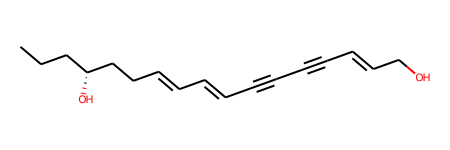

In [13]:
m

In [14]:
from urllib.request import urlopen
from urllib.parse import quote


In [15]:
def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = ['3-Methylheptane', 'Aspirin', 'Diethylsulfate', 'Diethyl sulfate', '50-78-2', 'Adamant']


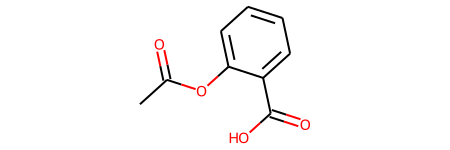

In [21]:
str = []
for ids in identifiers :
    # print(ids, CIRconvert(ids))
    str.append(CIRconvert(ids))
m = Chem.MolFromSmiles(str[1])
m

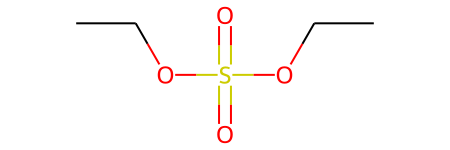

In [22]:
Chem.MolFromSmiles(str[2])

In [26]:
print(CIRconvert('Ezetimibe'))

O[C@@H](CC[C@@H]1[C@H](N(C1=O)c2ccc(F)cc2)c3ccc(O)cc3)c4ccc(F)cc4


https://towardsdatascience.com/how-to-use-machine-learning-for-drug-discovery-1ccb5fdf81ad
https://towardsdatascience.com/basic-molecular-representation-for-machine-learning-b6be52e9ff76
https://www.kaggle.com/code/vladislavkisin/tutorial-ml-in-chemistry-research-rdkit-mol2vec/notebook